# Clustering with Sklearn

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/_multivariate.py:535: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


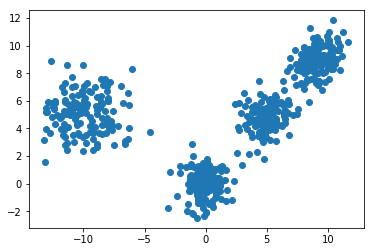

In [2]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[5,5], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[9,9], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[-10,5], cov=[[3,0.5],[0.2,2]])
for i in range(150):
    data.append(dist.rvs())    
    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

In [3]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

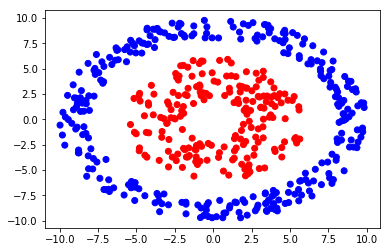

In [4]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [5]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

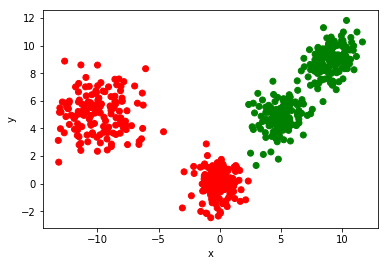

In [6]:
# Plot the data

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({2: 152, 0: 150, 3: 149, 1: 149})


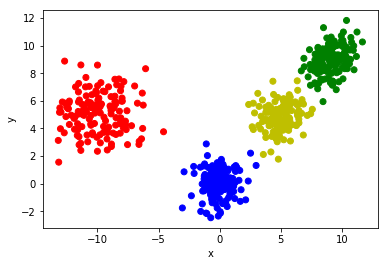

In [8]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Let's try the circular data.

Counter({0: 270, 1: 230})


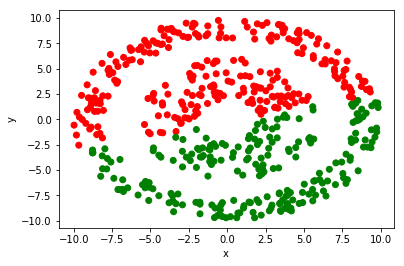

In [9]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Ouch! No so great on this dataset. Now let's try some real data.

In [10]:
of_df = pd.read_csv("./datasets/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


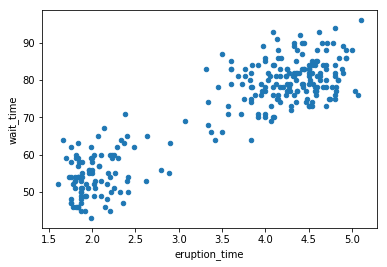

In [11]:
of_df.plot.scatter(x="eruption_time", y="wait_time")
plt.show()

In [12]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

Counter({0: 172, 1: 100})


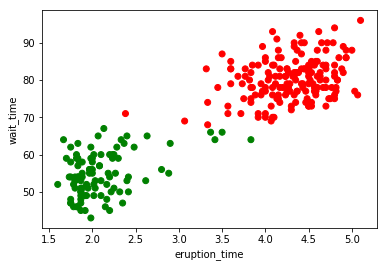

In [13]:
# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

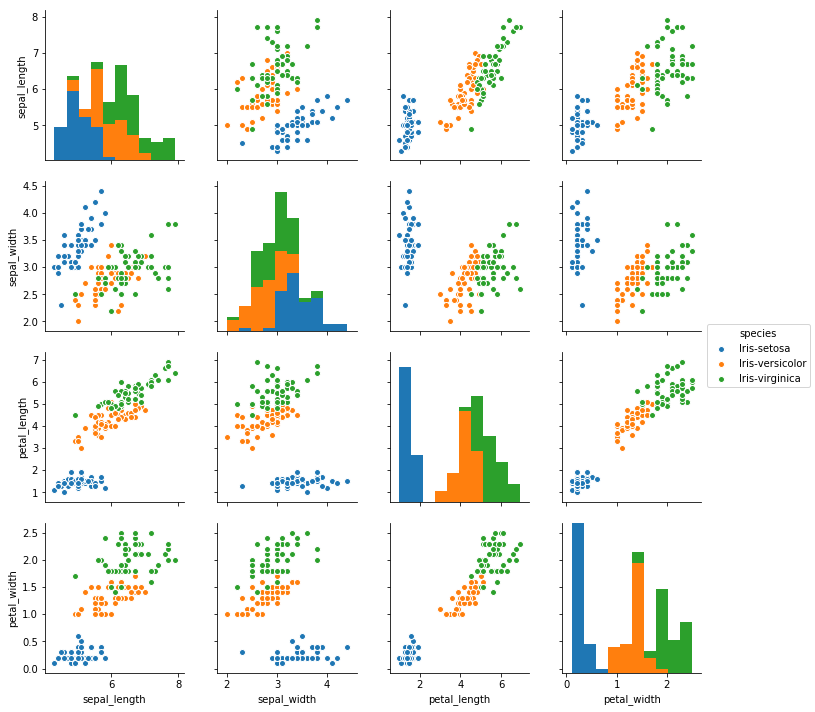

In [16]:
iris = pd.read_csv("./datasets/iris.data")
iris
sns.pairplot(iris, hue="species")
plt.show()

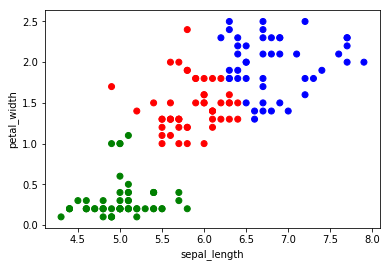

In [39]:
# sepal_length and petal_length, for k=2 and k=3
X = iris[["sepal_length", "petal_width"]]
mdl = KMeans(n_clusters=3)
mdl.fit(X)
# Clusters are given in the labels_ attribute
labels = mdl.predict(X)

colors = set_colors(labels)
plt.scatter(iris["sepal_length"], iris["petal_width"], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.show()

In [ ]:
# sepal_width and petal_width, for k=2 and k=3

In [42]:
# evaluate clusters with actual species
print (stats.mode(labels[0:50]).mode)
print (stats.mode(labels[50:100]).mode)
print (stats.mode(labels[100:]).mode)

label_map = {'Iris-setosa': 1, 'Iris-versicolor':0, 'Iris-virginica':2}
true_labels = iris.species.map(label_map).values
number_correct = 0
for t, l in zip(true_labels, labels):
    if t == l:
        number_correct += 1
print (number_correct / float(len(iris)))

[1]
[0]
[2]
0.8266666666666667


## DBSCAN

Counter({2: 148, 0: 147, 1: 145, 3: 134, -1: 26})


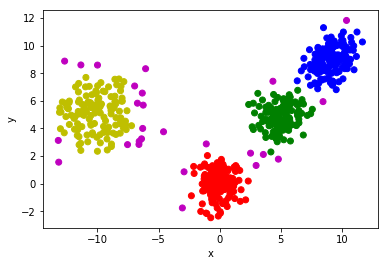

In [44]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({2: 145, 1: 139, 0: 136, 3: 106, -1: 62, 4: 12})


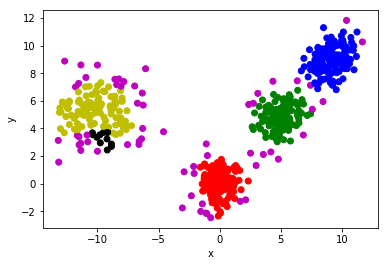

In [45]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


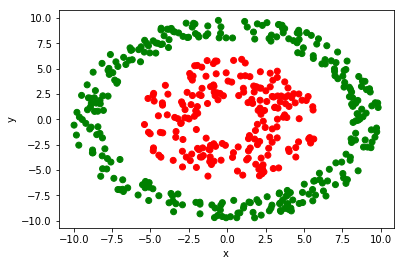

In [46]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

In [ ]:
## Create some synthetic data

data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,12],[1,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,1.1],[0.2,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'])
plt.show()

In [ ]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.5, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot dbscan models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

Counter({2: 49, 0: 46, -1: 35, 1: 20})


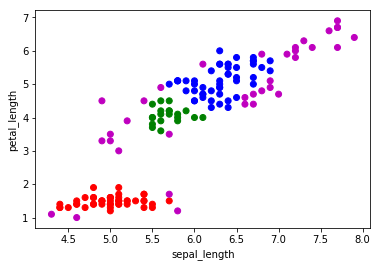

In [66]:
# sepal_length and petal_length
estimator = DBSCAN(eps=.3, min_samples=10)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(iris['sepal_length'], iris['petal_length'], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

Counter({1: 100, 0: 49, -1: 1})


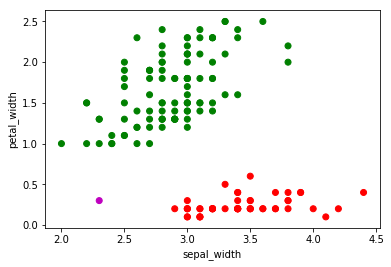

In [70]:
# sepal_width and petal_width
estimator = DBSCAN(eps=.5, min_samples=5)
X = iris[["sepal_width", "petal_width"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(iris['sepal_width'], iris['petal_width'], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

In [ ]:
# compare performance to true species values

## Hierarchical Clustering

Counter({2: 150, 3: 150, 1: 150, 0: 150})


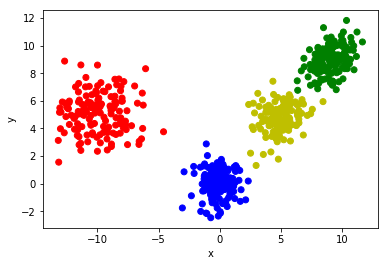

In [72]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({0: 311, 1: 189})


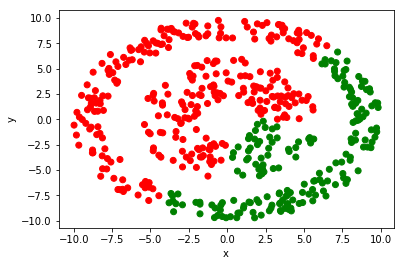

In [73]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [74]:
## Silhouette Coefficient

from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

print (metrics.silhouette_score(X, labels, metric='euclidean'))


Counter({2: 152, 0: 150, 1: 149, 3: 149})
0.711360306607


In [75]:
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))
print (metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({2: 145, 1: 139, 0: 136, 3: 106, -1: 62, 4: 12})
0.479269855408


Bigger is better, so k-means was a better clustering algorithm on this data set.